<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу" data-toc-modified-id="Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузим данные и подготовим их к анализу</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-Шагу-№-1" data-toc-modified-id="Выводы-по-Шагу-№-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по Шагу № 1</a></span></li></ul></li><li><span><a href="#Подготовим-данные" data-toc-modified-id="Подготовим-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовим данные</a></span><ul class="toc-item"><li><span><a href="#Посчитаем-количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам" data-toc-modified-id="Посчитаем-количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам</a></span></li></ul></li><li><span><a href="#Проанализируем-данные" data-toc-modified-id="Проанализируем-данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проанализируем данные</a></span><ul class="toc-item"><li><span><a href="#Построим-гистограммы" data-toc-modified-id="Построим-гистограммы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Построим гистограммы</a></span></li></ul></li><li><span><a href="#Проверим-гипотезы" data-toc-modified-id="Проверим-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверим гипотезы</a></span><ul class="toc-item"><li><span><a href="#Первая-гипотеза" data-toc-modified-id="Первая-гипотеза-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Первая гипотеза</a></span></li><li><span><a href="#Вторая-гипотеза" data-toc-modified-id="Вторая-гипотеза-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вторая гипотеза</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
try:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

In [3]:
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session_date' in column_name or 'call_date' in column_name or 'message_date' in column_name or 'churn_date' in column_name or 'reg_date' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                
    return df

calls = inspect(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Количество дубликатов - 0


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


1000_0      1
1344_881    1
1344_883    1
1344_884    1
1344_885    1
           ..
1171_562    1
1171_563    1
1171_564    1
1171_565    1
1499_219    1
Name: id, Length: 202607, dtype: int64

In [4]:
internet = inspect(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Количество дубликатов - 0


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


1000_0      1
1333_109    1
1334_0      1
1334_1      1
1334_2      1
           ..
1172_80     1
1172_81     1
1172_82     1
1172_83     1
1499_156    1
Name: id, Length: 149396, dtype: int64

In [5]:
messages = inspect(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Количество дубликатов - 0


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


1000_0      1
1344_248    1
1344_96     1
1344_95     1
1344_94     1
           ..
1174_352    1
1174_351    1
1174_350    1
1174_349    1
1499_183    1
Name: id, Length: 123036, dtype: int64

In [6]:
messages['message_date'].count()

123036

In [7]:
tariffs = inspect(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
Количество дубликатов - 0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


smart    1
ultra    1
Name: tariff_name, dtype: int64

In [8]:
users = inspect(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Количество дубликатов - 0


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64

Радим      6
Леонид     5
Пётр       5
Андрей     4
Адам       4
          ..
Зинаида    1
Глеб       1
Роза       1
Юзефа      1
Трифон     1
Name: first_name, Length: 246, dtype: int64

Андреенко     5
Березина      3
Аркадьев      3
Булгаков      3
Соловьев      3
             ..
Медведев      1
Минаева       1
Авдонюшкин    1
Андрейчук     1
Акимчин       1
Name: last_name, Length: 419, dtype: int64

smart    351
ultra    149
Name: tariff, dtype: int64

### Выводы по Шагу № 1

Количество уникальных пользователей 500 человек. 99 человек из них проживает в г. Москва (1/5 выборки) , 39 - в г. Санкт-Петербурге. 70% пользователей в настоящее время подключены к тарифу smart, 30% подключены к тарифу ultra.
Средний возраст клиента 46 лет. Пропущенных значений кроме даты прекращения пользования тарифом нет. Но оно по заданию может быть пропущенным

Для дальнейшего анализа таблицы необходимо соединить

## Подготовим данные

Соединим таблицы пользователей и звонков

In [9]:
data_usersandcalls = users.merge(calls, on='user_id')
data_usersandcalls

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.00
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.00
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,2.85
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,13.80
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,5.18
...,...,...,...,...,...,...,...,...,...,...,...
202602,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_215,2018-12-26,0.76
202603,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_216,2018-10-18,18.83
202604,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_217,2018-11-10,10.81
202605,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_218,2018-10-06,4.27


В таблицу вошли все звонки с таблицы calls

### Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [10]:
#добавим столбец с номером месяца звонка
data_usersandcalls["month"] = data_usersandcalls["call_date"].dt.month
data_usersandcalls
#округлим звонки до целого числа
data_usersandcalls['duration'] = np.ceil(data_usersandcalls['duration'])
data_usersandcalls

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.0,7
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.0,8
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,3.0,6
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,14.0,9
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,6.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
202602,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_215,2018-12-26,1.0,12
202603,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_216,2018-10-18,19.0,10
202604,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_217,2018-11-10,11.0,11
202605,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_218,2018-10-06,5.0,10


In [11]:
data_grouped = data_usersandcalls.groupby('tariff').agg({'duration':'sum'})
data_grouped

,duration
tariff,
smart,931577.0
ultra,518724.0


In [12]:
#выберем из таблицы продолжительность и количество звонков
pivot_calls = data_usersandcalls.pivot_table(index=['user_id', 'tariff', 'month'], values = 'duration', aggfunc = {'sum', 'count'})
pivot_calls.reset_index()

,user_id,tariff,month,count,sum
0,1000,ultra,5,22,159.0
1,1000,ultra,6,43,172.0
2,1000,ultra,7,47,340.0
3,1000,ultra,8,52,408.0
4,1000,ultra,9,58,466.0
...,...,...,...,...,...
3169,1498,smart,10,41,247.0
3170,1499,smart,9,9,70.0
3171,1499,smart,10,68,449.0
3172,1499,smart,11,74,612.0


In [13]:
#pivot_group = pivot_calls.groupby('tariff').agg({'sum':'sum'})
pivot_calls['sum'].sum()

1450301.0

Все значения на месте, продолжительность звонков никуда не исчезла

Соединим таблицы пользователей и сообщений

In [14]:
data_messages = users.merge(messages, on ='user_id', how='right')

#добавим столбец с номером месяца сообщения
data_messages["month"] = data_messages["message_date"].dt.month
data_messages

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,message_date,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-06-27,6
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-10-08,10
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-08-04,8
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-06-16,6
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-05,12
...,...,...,...,...,...,...,...,...,...,...,...
123031,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_179,2018-12-12,12
123032,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_180,2018-09-28,9
123033,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_181,2018-09-27,9
123034,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_182,2018-11-15,11


В таблицу вошли все значения из таблицы messages

In [15]:
#выберем количество сообщений по месяцам и по пользователям
pivot_messages = data_messages.pivot_table(index=['user_id', 'tariff', 'month'], values = 'message_date', aggfunc = 'count')
pivot_messages.reset_index()

,user_id,tariff,month,message_date
0,1000,ultra,5,22
1,1000,ultra,6,60
2,1000,ultra,7,75
3,1000,ultra,8,81
4,1000,ultra,9,57
...,...,...,...,...
2712,1498,smart,10,42
2713,1499,smart,9,11
2714,1499,smart,10,48
2715,1499,smart,11,59


In [16]:
#pivot_group2 = pivot_messages.groupby('tariff').agg({'message_date':'sum'})
pivot_messages['message_date'].sum()

123036

Все значения на месте

In [17]:
#соединим сводные таблицы сообщений и звонков
alls_pivot = pivot_messages.merge(pivot_calls, on = ['user_id', 'tariff', 'month'], how = 'outer')
alls_pivot = alls_pivot.rename(columns={"message_date": "message_count", "count": "calls_count", "sum": "calls_sum"})
alls_pivot.reset_index()


,user_id,tariff,month,message_count,calls_count,calls_sum
0,1000,ultra,5,22.0,22.0,159.0
1,1000,ultra,6,60.0,43.0,172.0
2,1000,ultra,7,75.0,47.0,340.0
3,1000,ultra,8,81.0,52.0,408.0
4,1000,ultra,9,57.0,58.0,466.0
...,...,...,...,...,...,...
3208,1494,smart,8,NaN,32.0,262.0
3209,1494,smart,9,NaN,66.0,501.0
3210,1494,smart,10,NaN,52.0,354.0
3211,1494,smart,11,NaN,63.0,411.0


In [18]:
alls_pivot['calls_sum'].sum()

1450301.0

In [19]:
alls_pivot['message_count'].sum()

123036.0

Соединим таблицы пользователей и расходов на интернет

In [20]:
data_internet = users.merge(internet, on = 'user_id')

#добавим столбец с номером месяца расхода трафика интернета
data_internet["month"] = data_internet["session_date"].dt.month
data_internet

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,Unnamed: 0,id,mb_used,session_date,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000_0,112.95,2018-11-25,11
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,1000_1,1052.81,2018-09-07,9
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2,1000_2,1197.26,2018-06-25,6
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000_3,550.27,2018-08-22,8
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4,1000_4,302.56,2018-09-24,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149391,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,149391,1499_152,318.90,2018-10-03,10
149392,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,149392,1499_153,490.13,2018-12-14,12
149393,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,149393,1499_154,0.00,2018-10-27,10
149394,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,149394,1499_155,1246.32,2018-11-26,11


In [21]:
data_internet['mb_used'].sum()

55305267.73

In [22]:
#посчитаем трафик интернета по месяцам
pivot_internet = data_internet.pivot_table(index = ['user_id', 'tariff', 'month'] , values = 'mb_used', aggfunc = 'sum')
pivot_internet.reset_index()

,user_id,tariff,month,mb_used
0,1000,ultra,5,2253.49
1,1000,ultra,6,23233.77
2,1000,ultra,7,14003.64
3,1000,ultra,8,14055.93
4,1000,ultra,9,14568.91
...,...,...,...,...
3198,1498,smart,10,20579.36
3199,1499,smart,9,1845.75
3200,1499,smart,10,17788.51
3201,1499,smart,11,17963.31


In [23]:
#и сложим все в одну таблицу
pivot = alls_pivot.merge(pivot_internet, on = ['user_id', 'tariff', 'month'], how = 'outer')
pivot = pivot.rename(columns={"mb_used": "mb_sum"})
pivot = pivot.reset_index()
pivot

,user_id,tariff,month,message_count,calls_count,calls_sum,mb_sum
0,1000,ultra,5,22.0,22.0,159.0,2253.49
1,1000,ultra,6,60.0,43.0,172.0,23233.77
2,1000,ultra,7,75.0,47.0,340.0,14003.64
3,1000,ultra,8,81.0,52.0,408.0,14055.93
4,1000,ultra,9,57.0,58.0,466.0,14568.91
...,...,...,...,...,...,...,...
3209,1494,smart,9,NaN,66.0,501.0,16962.51
3210,1494,smart,10,NaN,52.0,354.0,17767.24
3211,1494,smart,11,NaN,63.0,411.0,18052.45
3212,1494,smart,12,NaN,62.0,418.0,17621.21


In [24]:
pivot['mb_sum'].sum()

55305267.730000004

In [25]:
pivot['message_count'].sum()

123036.0

In [26]:
pivot['calls_sum'].sum()

1450301.0

In [27]:
tariffs = tariffs.rename(columns={"tariff_name": "tariff"})

In [28]:
#добавим тарифы
pivot_tariff = pivot.merge(tariffs, on = 'tariff', how = 'left')
pivot_tariff

,user_id,tariff,month,message_count,calls_count,calls_sum,mb_sum,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,5,22.0,22.0,159.0,2253.49,1000,30720,3000,1950,150,1,1
1,1000,ultra,6,60.0,43.0,172.0,23233.77,1000,30720,3000,1950,150,1,1
2,1000,ultra,7,75.0,47.0,340.0,14003.64,1000,30720,3000,1950,150,1,1
3,1000,ultra,8,81.0,52.0,408.0,14055.93,1000,30720,3000,1950,150,1,1
4,1000,ultra,9,57.0,58.0,466.0,14568.91,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1494,smart,9,NaN,66.0,501.0,16962.51,50,15360,500,550,200,3,3
3210,1494,smart,10,NaN,52.0,354.0,17767.24,50,15360,500,550,200,3,3
3211,1494,smart,11,NaN,63.0,411.0,18052.45,50,15360,500,550,200,3,3
3212,1494,smart,12,NaN,62.0,418.0,17621.21,50,15360,500,550,200,3,3


In [29]:
# округлим значения продолжительности звонков и использованного трафика до целых чисел в большую сторону

pivot_tariff['calls_sum'] = np.ceil(pivot_tariff['calls_sum'])
pivot_tariff['mb_sum'] = np.ceil(pivot_tariff['mb_sum'])
pivot_tariff.head()

,user_id,tariff,month,message_count,calls_count,calls_sum,mb_sum,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,5,22.0,22.0,159.0,2254.0,1000,30720,3000,1950,150,1,1
1,1000,ultra,6,60.0,43.0,172.0,23234.0,1000,30720,3000,1950,150,1,1
2,1000,ultra,7,75.0,47.0,340.0,14004.0,1000,30720,3000,1950,150,1,1
3,1000,ultra,8,81.0,52.0,408.0,14056.0,1000,30720,3000,1950,150,1,1
4,1000,ultra,9,57.0,58.0,466.0,14569.0,1000,30720,3000,1950,150,1,1


In [30]:
def total_revenue_monthly(row):
    
# определим переменные
    
    bill_minutes = 0
    bill_sms = 0
    bill_traffic = 0
    minutes = row['calls_sum']
    sms = row['message_count']
    traffic = row['mb_sum']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

# проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа
# если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
# если больше - то разницу умножаем на стоимость сверх тарифного плана
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        bill_minutes = 0
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        bill_sms = 0
    if traffic > traffic_limit:
        bill_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb
    if traffic < traffic_limit:
        bill_traffic = 0
        
# функция возвращает итоговый счет за месяц для клиента,
# в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
        
    return bill_minutes + bill_sms + bill_traffic + monthly_fee

In [31]:
pivot_tariff['total_revenue'] = pivot_tariff.apply(total_revenue_monthly, axis=1)
pivot_tariff

,user_id,tariff,month,message_count,calls_count,calls_sum,mb_sum,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_revenue
0,1000,ultra,5,22.0,22.0,159.0,2254.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,ultra,6,60.0,43.0,172.0,23234.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,ultra,7,75.0,47.0,340.0,14004.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,ultra,8,81.0,52.0,408.0,14056.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,ultra,9,57.0,58.0,466.0,14569.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1494,smart,9,NaN,66.0,501.0,16963.0,50,15360,500,550,200,3,3,953.0
3210,1494,smart,10,NaN,52.0,354.0,17768.0,50,15360,500,550,200,3,3,1150.0
3211,1494,smart,11,NaN,63.0,411.0,18053.0,50,15360,500,550,200,3,3,1150.0
3212,1494,smart,12,NaN,62.0,418.0,17622.0,50,15360,500,550,200,3,3,1150.0


Добавим в таблицу города для дальнейшего анализа

In [32]:
pivot_tariff = pivot_tariff.merge(users[['user_id', 'city']], on = 'user_id')
pivot_tariff

,user_id,tariff,month,message_count,calls_count,calls_sum,mb_sum,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_revenue,city
0,1000,ultra,5,22.0,22.0,159.0,2254.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
1,1000,ultra,6,60.0,43.0,172.0,23234.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
2,1000,ultra,7,75.0,47.0,340.0,14004.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
3,1000,ultra,8,81.0,52.0,408.0,14056.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
4,1000,ultra,9,57.0,58.0,466.0,14569.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1494,smart,8,NaN,32.0,262.0,6591.0,50,15360,500,550,200,3,3,550.0,Омск
3210,1494,smart,9,NaN,66.0,501.0,16963.0,50,15360,500,550,200,3,3,953.0,Омск
3211,1494,smart,10,NaN,52.0,354.0,17768.0,50,15360,500,550,200,3,3,1150.0,Омск
3212,1494,smart,11,NaN,63.0,411.0,18053.0,50,15360,500,550,200,3,3,1150.0,Омск


In [33]:
#переведем мегабайты в гигабайты для дальнейших расчетов

pivot_tariff['mb_sum'] = np.ceil((pivot_tariff['mb_sum'])/1024)
pivot_tariff = pivot_tariff.rename(columns={"mb_sum": "gb_sum"})
pivot_tariff

,user_id,tariff,month,message_count,calls_count,calls_sum,gb_sum,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_revenue,city
0,1000,ultra,5,22.0,22.0,159.0,3.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
1,1000,ultra,6,60.0,43.0,172.0,23.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
2,1000,ultra,7,75.0,47.0,340.0,14.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
3,1000,ultra,8,81.0,52.0,408.0,14.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
4,1000,ultra,9,57.0,58.0,466.0,15.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1494,smart,8,NaN,32.0,262.0,7.0,50,15360,500,550,200,3,3,550.0,Омск
3210,1494,smart,9,NaN,66.0,501.0,17.0,50,15360,500,550,200,3,3,953.0,Омск
3211,1494,smart,10,NaN,52.0,354.0,18.0,50,15360,500,550,200,3,3,1150.0,Омск
3212,1494,smart,11,NaN,63.0,411.0,18.0,50,15360,500,550,200,3,3,1150.0,Омск


## Проанализируем данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [35]:
data = pivot_tariff.pivot_table(index = 'tariff', values = ['calls_sum','message_count','gb_sum', 'total_revenue'], aggfunc = ['mean','var','std'])
data = data.reset_index()
data

tariff        mean                                                  var  \
           calls_sum     gb_sum message_count total_revenue     calls_sum   
0  smart  419.062978  16.336176     38.716441   1289.973531  35844.189551   
1  ultra  545.451104  19.694359     61.161006   2070.152284  94203.418396   

                                                  std                          \
      gb_sum message_count  total_revenue   calls_sum    gb_sum message_count   
0  32.923756    717.594201  669785.708006  189.325618  5.737923     26.787949   
1  94.146734   2109.659183  141516.745079  306.925754  9.702924     45.931026   

                 
  total_revenue  
0    818.404367  
1    376.187114

**Согласно выборке получились следующие выводы.**

Тариф СМАРТ.
Количество минут разговора, которое требуется пользователю в месяц - 400,
Количество сообщений - 40,
Количество гигабайт - 16,3,

Тариф УЛЬТРА.
Количество минут разговора, которое требуется пользователю в месяц - 520,
Количество сообщений - 60,
Количество гигабайт - 19.7.

### Построим гистограммы

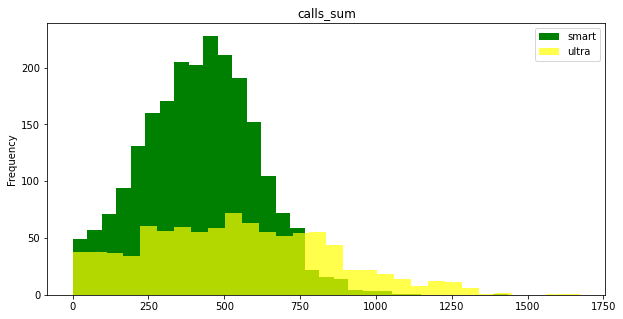

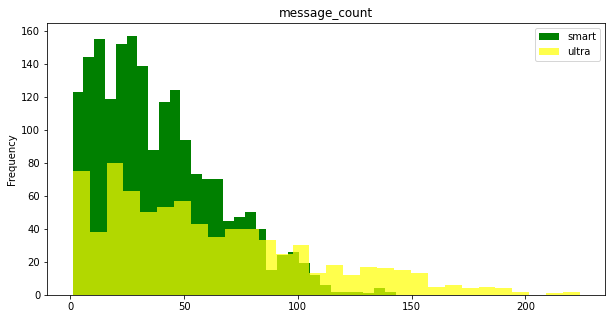

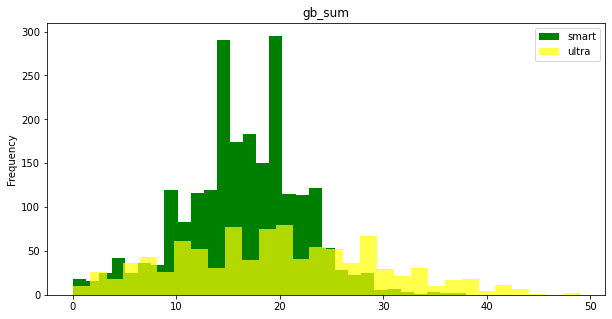

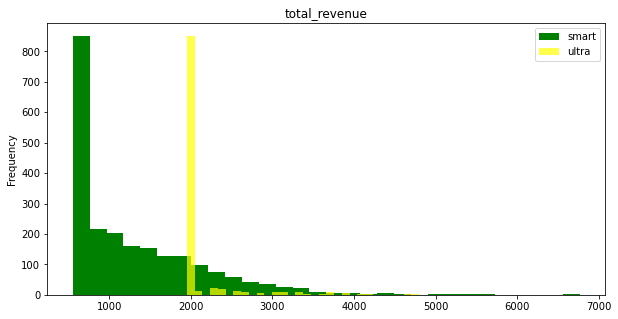

In [36]:
list_of_columns=['calls_sum','message_count','gb_sum','total_revenue']
tariffs = ['ultra','smart']
for column in list_of_columns:
        pivot_tariff[pivot_tariff['tariff'] == 'smart'][column].plot(kind = 'hist',
                                                                    bins = 30,
                                                                    label = 'smart', 
                                                                    figsize = (10,5),
                                                                    color = 'green')
        pivot_tariff[pivot_tariff['tariff'] == "ultra"][column].plot(kind = 'hist',
                                                                    bins = 30,
                                                                    alpha =0.7,
                                                                    label = 'ultra',
                                                                    figsize = (10,5),
                                                                    color = 'yellow')
        plt.title(column)
        plt.legend()
        plt.show()

По мегабайтам и звонкам наблюдаются симметричные графики, а по сообщениям и выручке скошенность вправо.

## Проверим гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Первая гипотеза 


Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [37]:
sample_1 = pivot_tariff[pivot_tariff['tariff'] == 'smart']['total_revenue']
sample_1

8        550.0
9       1150.0
10      1550.0
11       950.0
12       550.0
         ...  
3209     550.0
3210     953.0
3211    1150.0
3212    1150.0
3213    1150.0
Name: total_revenue, Length: 2229, dtype: float64

In [38]:
sample_1 = pivot_tariff[pivot_tariff['tariff'] == 'smart']['total_revenue']
sample_2 = pivot_tariff[pivot_tariff['tariff'] == "ultra"]['total_revenue']

alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_ind(sample_1, sample_2)

print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

р-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


**Вывод**

Нулевая гипотеза, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны отвергнута проверкой, скорее всего предположение неверно. Вывод - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

### Вторая гипотеза

Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [39]:
revenue_moscow = pivot_tariff[pivot_tariff['city'] == 'Москва']['total_revenue']
revenue_others = pivot_tariff[pivot_tariff['city'] != 'Москва']['total_revenue']

alpha = 0.05 # критический уровень статистической значимости
            

results = st.ttest_ind(revenue_moscow, revenue_others)

print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

р-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Нулевую гипотезу отвергнуть не получилось - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Нулевая гипотеза формировалась на основании того, что две совокупности Х и У в нулевой гипотезе, которые сравниваются по одному или нескольким признакам, не различаются между собой. А в альтернативной - различаются

Для проверки гипотиз использователся метод равенства средних двух генеральных независимых совокупностей как наиболее подходящий по смыслу

## Общий вывод

Компания Мегалайн предлагает пользователям два тарифных плана:

**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей 

Для анализа данных имеются пять таблиц - звонки, сообщения, пользователи, интернет трафик пользователей и сами тарифные планы. После обработки данных, совмещения таблиц в одну базу данных и расчете средних значений по каждому тарифу в разрезе пользователей и месяцев пользования тарифом, имеем следующие выводы.

Средняя выручка тарифов СМАРТ и УЛЬТРА различаются в пользу тарифа УЛЬТРА. 

1250 рублей в тарифе СМАРТ против 2000 рублей в тарифе УЛЬТРА.

То есть в тарифе СМАРТ пользователи чаще пользуются дополнительными услугами, когда в УЛЬТРА хватает и встроенных услуг.
Согласно проведенному исследованию, пользователям обеих тарифов требуется примерно одинаковый пакет услуг. 
При значительной разнице в стоимости тарифов, тариф УЛЬТРА для оператора сотовой связи будет предпочтителен.

Учитывая, что к тарифу СМАРТ подключены 70% пользователей, то общая выручка от них превышает выручку от пользователей тарифа УЛЬТРА, возможно стоит обратить внимание на предложение пользователям, использующим тариф СМАРТ + дополнительные опции перейти на тариф УЛЬТРА.

также, после проверки гипотезы выявлено, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
